<a href="https://colab.research.google.com/github/ivn-srg/data-analysis-course-omsu/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%2012/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_12_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical models to analyze and forecast time series dataset

## Авторегрессия (AR)

📌 Идея: будущее значение зависит от прошлых значений.

Пример: если ты хочешь предсказать цену на завтра — смотри, какая она была вчера, позавчера и т.д.

**Формула:**  
$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \varepsilon_t
$$

**Параметры:**  
p — количество лагов (прошлых значений), используемых в модели.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series([10, 12, 13, 12, 15, 16, 17, 18])
model = AutoReg(data, lags=1).fit()
predictions = model.predict(start=1, end=len(data)-1)
print("Предсказания AR(1):", predictions.values)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(data[1:], predictions))
print("RMSE AR-модели:", rmse)

Предсказания AR(1): [11.67045455 13.375      14.22727273 13.375      15.93181818 16.78409091
 17.63636364]
RMSE AR-модели: 1.0713203408538796


## Скользящее среднее (MA)

📌 Идея: будущее значение зависит от ошибок (шумов), сделанных в прошлом.

Пример: если модель вчера ошиблась на +10, она может и завтра также ошибиться — это можно учесть.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

data = pd.Series([5, 6, 5, 7, 8, 7, 9, 10])
model = ARIMA(data, order=(0, 0, 1)).fit()
predictions = model.predict(start=1, end=len(data)-1)
print("Предсказания MA(1):", predictions.values)

rmse = mean_squared_error(data[1:], predictions)
print("RMSE MA-модели:", rmse)

Предсказания MA(1): [6.02501369 7.03335153 5.52501376 8.23001623 6.85834715 7.17144404
 8.6500136 ]
RMSE MA-модели: 1.6499688191434427


## Авторегрессионное скользящее среднее (ARMA) AR + MA

📌 Идея: объединяем прошлые значения и прошлые ошибки.

🔸 Когда использовать: когда оба фактора (и значения, и ошибки) влияют на будущее.

❗ Требование: ряд должен быть стационарным (среднее и дисперсия постоянны).

**Формула:**

$$X_t = c + \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}$$

**Параметры:**
- p — порядок AR,
- q — порядок MA.

In [ ]:
data = pd.Series([2, 3, 2, 5, 4, 5, 5, 4, 6, 5])
model = ARIMA(data, order=(1, 0, 1)).fit()
predictions = model.predict(start=1, end=len(data)-1)
print("Предсказания ARMA(1,1):", predictions.values)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data[1:], predictions)
print("MAE ARMA-модели:", mae)


Предсказания ARMA(1,1): [3.04804425 3.25807778 2.95793293 3.98098035 3.98970616 4.37092919
 4.5152033  4.19188946 4.82535859]
MAE ARMA-модели: 0.8338365177114136


## Авторегрессионное интегрированное скользящее среднее (ARIMA)
По сути: ARMA + дифференцирование

📌 Идея: если ряд нестабильный (растёт, колеблется), делаем его стационарным, взяв разности.

**Формула:**

$$\nabla^d X_t = X_t - X_{t-d}$$

где после разностей применяется ARMA-модель:

$$\nabla^d X_t = c + \sum_{i=1}^p \phi_i \nabla^d X_{t-i} + \sum_{j=1}^q \theta_j \varepsilon_{t-j} + \varepsilon_t$$

**Параметры:**
- p — лаги в AR
- d — число дифференцирований
- q — лаги ошибок (MA)

In [ ]:
import numpy as np

data = pd.Series([50, 52, 55, 60, 62, 65, 70, 72, 75, 80])
model = ARIMA(data, order=(1, 1, 1)).fit()
predictions = model.predict(start=1, end=len(data)-1)
print("Предсказания ARIMA(1,1,1):", predictions.values)

rmse = mean_squared_error(data[1:], predictions)
print("RMSE ARIMA-модели:", rmse)

Предсказания ARIMA(1,1,1): [50.00054646 53.72409742 57.31477645 63.16454714 64.88457584 67.90694167
 73.24680693 75.07259747 78.06368871]
RMSE ARIMA-модели: 2.655072515708036


## Сезонное авторегрессионное интегрированное скользящее среднее (SARIMA)

По сути: SARIMA = ARIMA + сезонность

📌 Идея: добавляем сезонные лаги, чтобы учитывать повторяющиеся шаблоны (например, каждый декабрь — рост продаж).

Формат: SARIMA(p,d,q)(P,D,Q,s)

(
𝑝
,
𝑑
,
𝑞
)
(p,d,q) — обычные параметры

(
𝑃
,
𝐷
,
𝑄
,
𝑠
)
(P,D,Q,s) — сезонные параметры

𝑠
 — длина сезона (например, 12 для месяцев)

🔸 Когда использовать: если есть сезонные колебания.

**Пример:**  
Если продажи имеют годовую сезонность (например, по месяцам), используем SARIMA с s=12

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.Series([120, 130, 140, 150, 160, 155, 150, 145, 150, 160, 170, 180,
                  130, 140, 150, 160, 170, 165, 160, 155, 160, 170, 180, 190])
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
predictions = model.predict(start=12, end=23)
print("Предсказания SARIMA:", predictions.values)

Предсказания SARIMA: [240. 140. 150. 160. 170. 165. 160. 155. 160. 170. 180. 190.]


## Сезонное авторегрессионное интегрированное скользящее среднее с экзогенными регрессорами (SARIMAX)

**Описание:**  
SARIMAX — расширение SARIMA, которое учитывает **внешние регрессоры (exogenous variables)**. Это может быть, например, реклама, курс валют, температура и пр., влияющие на прогнозируемый ряд.

**Формула:**

$$Y_t = ARIMA(p, d, q) \times (P, D, Q, s) + \beta X_t + \varepsilon_t$$

где X_t — внешние переменные.

**Параметры:**

- ARIMA: (p,d,q)(p, d, q)
    
- Сезонность: (P,D,Q,s)(P, D, Q, s)
    
- `exog`: внешний регрессор (временной ряд той же длины)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Генерация данных
np.random.seed(42)
n = 60  # 5 лет по месяцам
time_index = pd.date_range(start='2018-01-01', periods=n, freq='M')

# Целевая переменная: продажи с трендом и сезонностью
seasonal_pattern = np.tile([10, 12, 15, 18, 20, 22, 25, 30, 28, 24, 18, 12], 5)
trend = np.linspace(50, 100, n)
noise = np.random.normal(0, 2, n)
sales = trend + seasonal_pattern + noise

# Внешний фактор: реклама (exogenous regressor)
ads = 5 + 0.2 * np.arange(n) + np.random.normal(0, 0.5, n)

# DataFrame
df = pd.DataFrame({
    "sales": sales,
    "ads": ads
}, index=time_index)

# Обучение модели SARIMAX
model = SARIMAX(df['sales'], exog=df[['ads']], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Прогноз
forecast = results.predict(start=48, end=59, exog=df[['ads']].iloc[48:60])
print("Прогноз SARIMAX:\n", forecast)

# Метрика
true_values = df['sales'].iloc[48:60]
rmse = mean_squared_error(true_values, forecast)
print("RMSE SARIMAX:", round(rmse, 2))


Прогноз SARIMAX:
 2022-01-31    100.217106
2022-02-28    101.225629
2022-03-31    105.106145
2022-04-30    111.856356
2022-05-31    113.289299
2022-06-30    116.542062
2022-07-31    120.581629
2022-08-31    127.236157
2022-09-30    125.601343
2022-10-31    121.780593
2022-11-30    117.268009
2022-12-31    111.186201
Freq: ME, Name: predicted_mean, dtype: float64
RMSE SARIMAX: 2.83


# Работа реальными данными

# Import Modules

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Dataset Description

## 1. Create Dataframe, parsing datetime and set it as index

In [ ]:
data = 'btc.csv'
df = pd.read_csv(data, parse_dates = True, index_col = "Date")

df

,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume
Date,,,,,,,,
2018-01-02,14982.099609,12902.719727,7006.899902,3742.0,16846600192,3397430000,1929700000,497857.0
2018-01-03,15201.000000,12957.280273,7065.529785,3749.0,16871900160,3544030000,2173130000,1009997.0
2018-01-04,15599.200195,13028.459961,7077.910156,3749.0,21783199744,3697340000,2103220000,669448.0
2018-01-05,17429.500000,13103.230469,7136.560059,3758.0,23840899072,3239280000,2024000000,2225274.0
2018-01-08,15170.099609,13114.349609,7157.390137,3744.0,18413899776,3246160000,2055010000,930995.0
...,...,...,...,...,...,...,...,...
2023-06-26,30271.130859,15518.740234,13335.780273,8414.0,16493186997,3415030000,4430600000,1210754.0
2023-06-27,30688.164062,15646.679688,13555.669922,8358.0,16428827944,3573500000,5053660000,847622.0
2023-06-28,30086.246094,15617.360352,13591.750000,8390.0,14571500779,3739330000,4533270000,950657.0


In [ ]:
df = df[['BTC', 'BTC_Volume']]

####       Lets Visualize

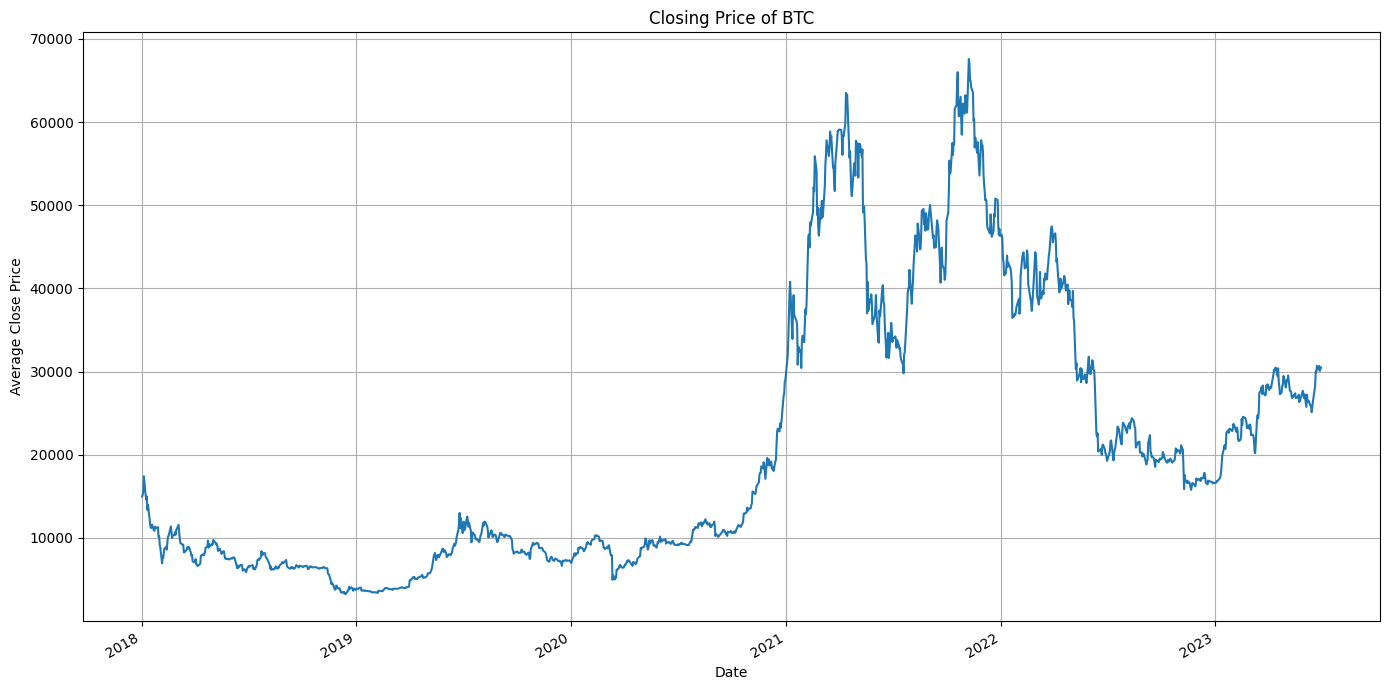

In [ ]:
# Plot the monthly average closing prices
plt.figure(figsize=(14, 7))
df['BTC'].plot(title='Closing Price of BTC')
plt.ylabel('Average Close Price')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
f"{adfuller(df['BTC'], autolag='AIC')[1]:2f}"

'0.420171'

<Axes: xlabel='Date'>

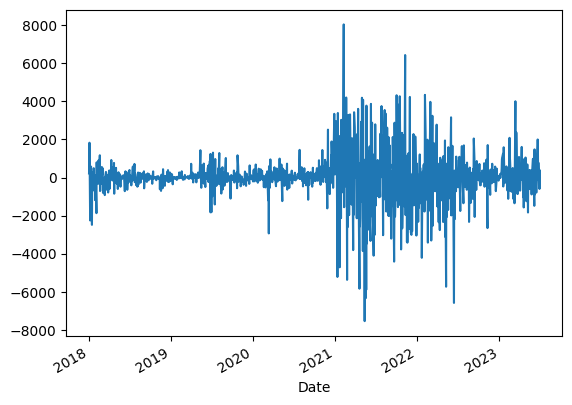

In [ ]:
df['BTC'].diff().dropna().plot()

In [ ]:
f"{adfuller(df['BTC'].diff().dropna(), autolag='AIC')[1]:2f}"

'0.000000'

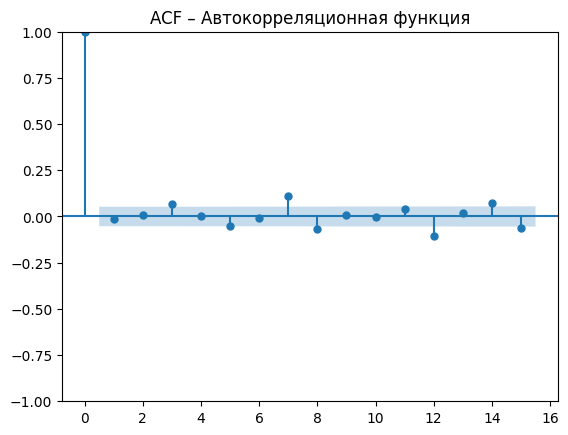

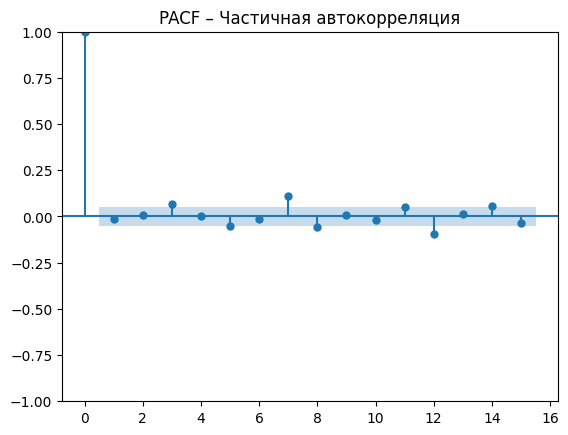

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_btc_diff_price = df['BTC'].diff().dropna()

# Построение коррелограммы ACF (автокорреляции)
plot_acf(df_btc_diff_price, lags=15)
plt.title('ACF – Автокорреляционная функция')
plt.show()

# Построение частичной автокорреляции (PACF)
plot_pacf(df_btc_diff_price, lags=15, method='ywm')  # 'ywm' — устойчивый метод
plt.title('PACF – Частичная автокорреляция')
plt.show()

## Чем отличаются графики?
✂️ Частичная автокорреляция (PACF):

Показывает "чистую" связь между текущим значением и тем, что было 3 дня назад, исключив влияние промежуточных лагов.

Пример:

PACF(3) — насколько напрямую связано значение сегодня и 3 дня назад, если убрать эффект 1-го и 2-го дня.

---

🔁 Автокорреляция (ACF):

Показывает, насколько текущее значение связано с прошлыми — например, с тем, что было 1 день назад, 2 дня назад и т.д.

Пример:

ACF(3) — как значение сегодня связано с тем, что было 3 дня назад, учитывая также влияние промежуточных дней (1 и 2 дня назад).

## 3. ARIMA model

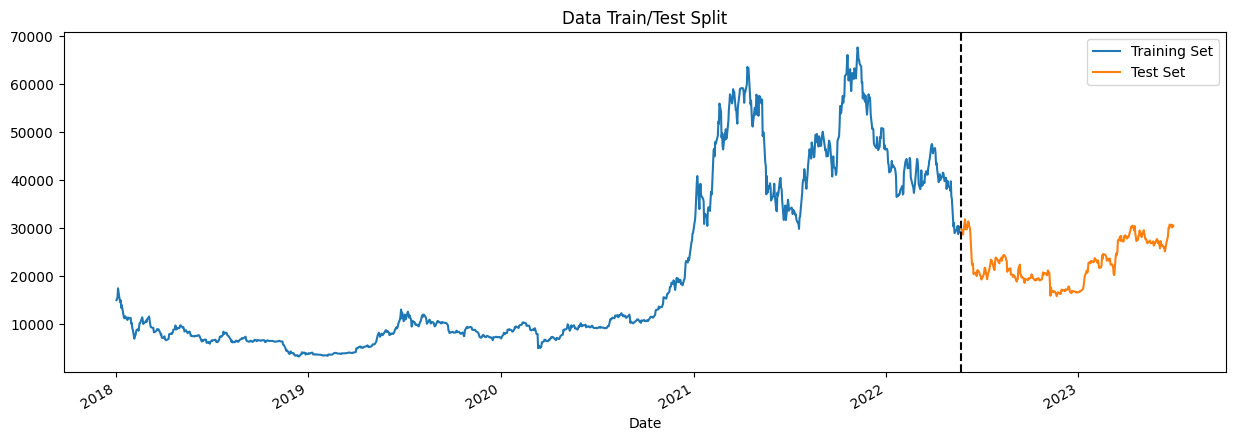

In [ ]:
# Train/Test split
size = int(len(df) * 0.8)
df_train = df['BTC'].iloc[:size]
df_test = df['BTC'].iloc[size:]
fig, ax = plt.subplots(figsize=(15, 5))
df_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
df_test.plot(ax=ax, label='Test Set')
ax.axvline(df_train.index[-1], color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

### ---> Define best order (p, d, q)

In [ ]:
# Function to perform the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result[1] <= 0.05

# Check if the data is stationary
is_stationary = adf_test(df['BTC'])

# If not stationary, difference the data
if not is_stationary:
    differenced = df['BTC'].diff().dropna()
    is_differenced_stationary = adf_test(differenced)
else:
    is_differenced_stationary = False

# Grid search for ARIMA parameters
p_values = range(0, 10)
d_values = [1] if is_differenced_stationary else [0, 1]
q_values = range(0, 7)
best_aic = float('inf')
best_order = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                model = ARIMA(df['BTC'], order=order)
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = order
            except:
                continue

best_order

(7, 1, 6)

### ---> Fitting data into model

In [ ]:
#### Fit the ARIMA model with the best order
model = ARIMA(df['BTC'], order=best_order)
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    BTC   No. Observations:                 1383
Model:                 ARIMA(7, 1, 6)   Log Likelihood              -11691.351
Date:                Fri, 16 May 2025   AIC                          23410.702
Time:                        20:18:02   BIC                          23483.940
Sample:                             0   HQIC                         23438.097
                               - 1383                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2248      0.058     -3.875      0.000      -0.339      -0.111
ar.L2          0.3102      0.046      6.797      0.000       0.221       0.400
ar.L3         -0.1398      0.040     -3.516      0.000      -0.218      -0.062
ar.L4          0.1885      0.041      4.557      0.000       0.107       0.270
ar.L5         -0.3969      0.043     -9.184      0.000      -0.482      -0.312
ar.L6         -0.7105      0.051    -13.926      0.000      -0.810      -0.610
ar.L7          0.0932      0.022      4.271      0.000       0.050       0.136
ma.L1          0.2165      0.054      3.999      0.000       0.110       0.323
ma.L2         -0.2912      0.044     -6.552      0.000      -0.378      -0.204
ma.L3          0.2148      0.041      5.281      0.000       0.135       0.294
ma.L4         -0.2157      0.040     -5.454      0.000      -0.293      -0.138
ma.L5          0.3635      0.042      8.666      0.000       0.281       0.446
ma.L6          0.7495      0.054     13.917      0.000       0.644       0.855
sigma2      1.311e+06   2.43e+04     54.041      0.000    1.26e+06    1.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3666.64
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               9.23   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Прогноз
predict_arima = model_fit.predict(start=df_test.index[0], end=df_test.index[-1])

# Метрика
rmse = mean_squared_error(df_test, predict_arima)
mape = np.mean(np.abs((df_test - predict_arima)/df_test)) * 100
print("RMSE ARIMA:", round(rmse, 2))
print("MAPE ARIMA:", round(mape, 2))

RMSE ARIMA: 827996.02
MAPE ARIMA: 2.6


In [ ]:
forecast_arima = model_fit.forecast(steps=7)

future_dates = pd.date_range(start=df_test.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')

forecast_series_arima = pd.Series(forecast_arima.values, index=future_dates)

forecast_series_arima

,0
2023-07-01,30383.475812
2023-07-02,30381.592355
2023-07-03,30310.669205
2023-07-04,30134.601296
2023-07-05,29897.119228
2023-07-06,29979.891682
2023-07-07,29969.210439


In [ ]:
%pip install pmdarima

In [ ]:
from pmdarima import auto_arima

# Try to find the best parameters for arima model
stepwise_fit = auto_arima(df['BTC'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 8, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)
# assign the parameter to "best_order" variable
best_order = stepwise_fit.get_params()['order']

best_order

In [ ]:
# ARIMA(1,0,0)(2,1,0)[12]
model = SARIMAX(df['BTC'], order=(1,0,0), seasonal_order=(2,1,0,12))
model_sarima = model.fit(disp=False)

model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                BTC   No. Observations:                 1383
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood              -11836.782
Date:                            Fri, 16 May 2025   AIC                          23681.565
Time:                                    20:40:31   BIC                          23702.458
Sample:                                         0   HQIC                         23689.383
                                           - 1383                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9669      0.003    290.786      0.000       0.960       0.973
ar.S.L12      -0.7534      0.013    -58.917      0.000      -0.778      -0.728
ar.S.L24      -0.3930      0.014    -27.914      0.000      -0.421      -0.365
sigma2      1.823e+06   3.48e+04     52.447      0.000    1.76e+06    1.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):              2890.87
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               4.78   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Прогноз
predict_sarima = model_sarima.predict(start=df_test.index[0], end=df_test.index[-1])

# Метрика
rmse = mean_squared_error(df_test, predict_sarima)
mape = np.mean(np.abs((df_test - predict_sarima)/df_test)) * 100
print("RMSE SARIMA:", round(rmse, 2))
print("MAPE SARIMA:", round(mape, 2))

RMSE SARIMAX: 980916.6
MAPE SARIMAX: 3.09


In [ ]:
forecast_sarima = model_sarima.forecast(steps=7)

future_dates = pd.date_range(start=df_test.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')

forecast_series_sarima = pd.Series(forecast_sarima.values, index=future_dates)

forecast_series_sarima

,0
2023-07-01,30232.724474
2023-07-02,30336.699958
2023-07-03,30157.172051
2023-07-04,30548.634441
2023-07-05,30954.945492
2023-07-06,30429.147053
2023-07-07,30833.133359


In [ ]:
# Определим целевую переменную и экзогенную
endog = df['BTC']
exog = df[['BTC_Volume']]  # обязательно двойные скобки → 2D DataFrame

# Обучаем модель с экзогенной переменной
model = SARIMAX(endog, exog=exog, order=(1,0,0), seasonal_order=(2,1,0,12))
model_sarimax = model.fit(disp=False)

# Показываем сводку
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 BTC   No. Observations:                 1383
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood              -12203.771
Date:                             Fri, 16 May 2025   AIC                          24419.542
Time:                                     20:49:33   BIC                          24450.882
Sample:                                          0   HQIC                         24431.270
                                            - 1383                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BTC_Volume -7.381e-09   2.02e-09     -3.655      0.000   -1.13e-08   -3.42e-09
ar.L1          0.9119      0.008    119.268      0.000       0.897       0.927
ma.L1         -0.0649      0.021     -3.097      0.002      -0.106      -0.024
ar.S.L12       0.0450      0.016      2.887      0.004       0.014       0.075
ar.S.L24       0.1335      0.019      7.049      0.000       0.096       0.171
sigma2      3.311e+06   4.37e-09   7.58e+14      0.000    3.31e+06    3.31e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.43   Jarque-Bera (JB):              5093.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.80   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  4e+29. Standard errors may be unstable.
"""

In [ ]:
# Прогноз
predict_sarimax = model_sarimax.predict(start=df_test.index[0], end=df_test.index[-1])

# Метрика
rmse = mean_squared_error(df_test, predict_sarimax)
mape = np.mean(np.abs((df_test - predict_sarimax)/df_test)) * 100
print("RMSE SARIMAX:", round(rmse, 2))
print("MAPE SARIMAX:", round(mape, 2))

RMSE SARIMAX: 1781403.59
MAPE SARIMAX: 4.19


In [ ]:
forecast_sarimax = model_sarimax.forecast(steps=7, exog=df['BTC_Volume'][-7:])

future_dates = pd.date_range(start=df_test.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')

forecast_series_sarimax = pd.Series(forecast_sarimax.values, index=future_dates)

forecast_series_sarimax

,0
2023-07-01,29247.691229
2023-07-02,29495.430698
2023-07-03,29971.707201
2023-07-04,31704.536087
2023-07-05,33349.074490
2023-07-06,32696.912379
2023-07-07,33408.451004


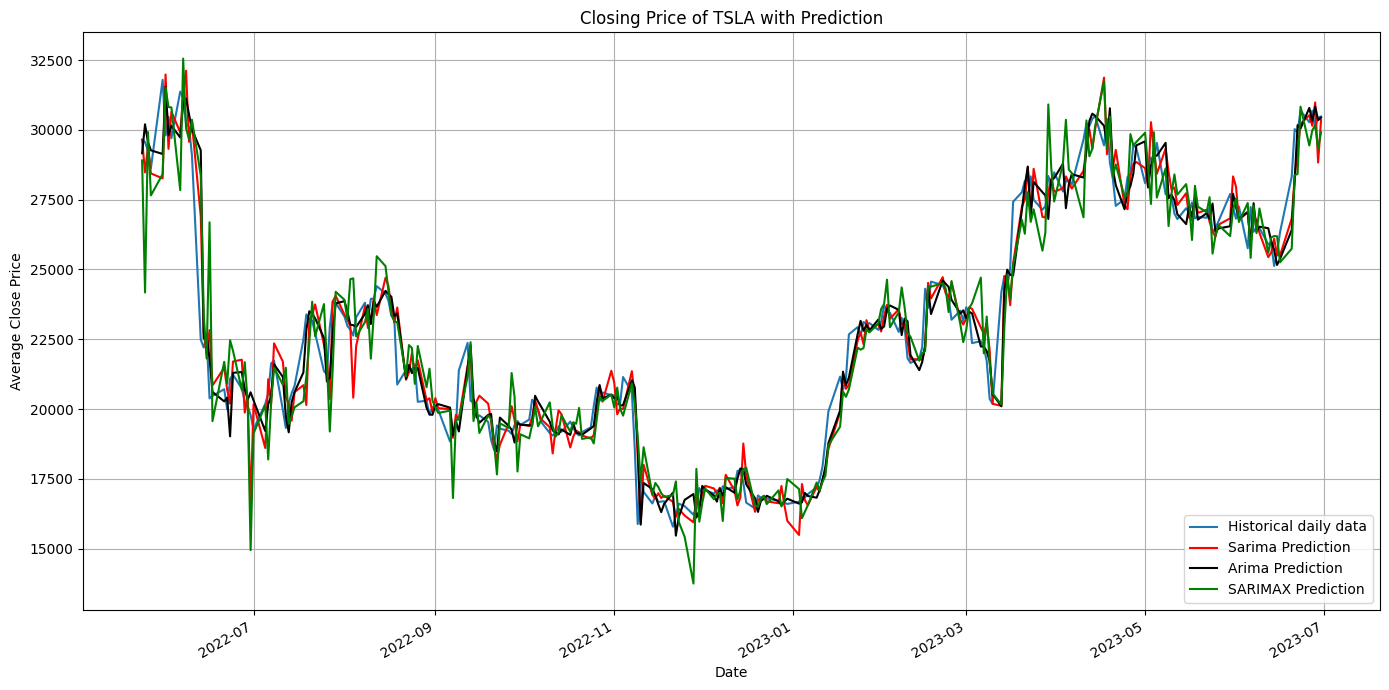

In [ ]:
# Plot historical and forecasted data
plt.figure(figsize=(14, 7))
df_test.plot(label='Historical daily data', legend=True)
predict_sarima.plot(label='Sarima Prediction', color='red', legend=True)
predict_arima.plot(label='Arima Prediction', color='black', legend=True)
predict_sarimax.plot(label='SARIMAX Prediction', color='green', legend=True)
plt.title('Closing Price of TSLA with Prediction')
plt.ylabel('Average Close Price')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Forcasting the next 7 days

### ---> Lets Visualise

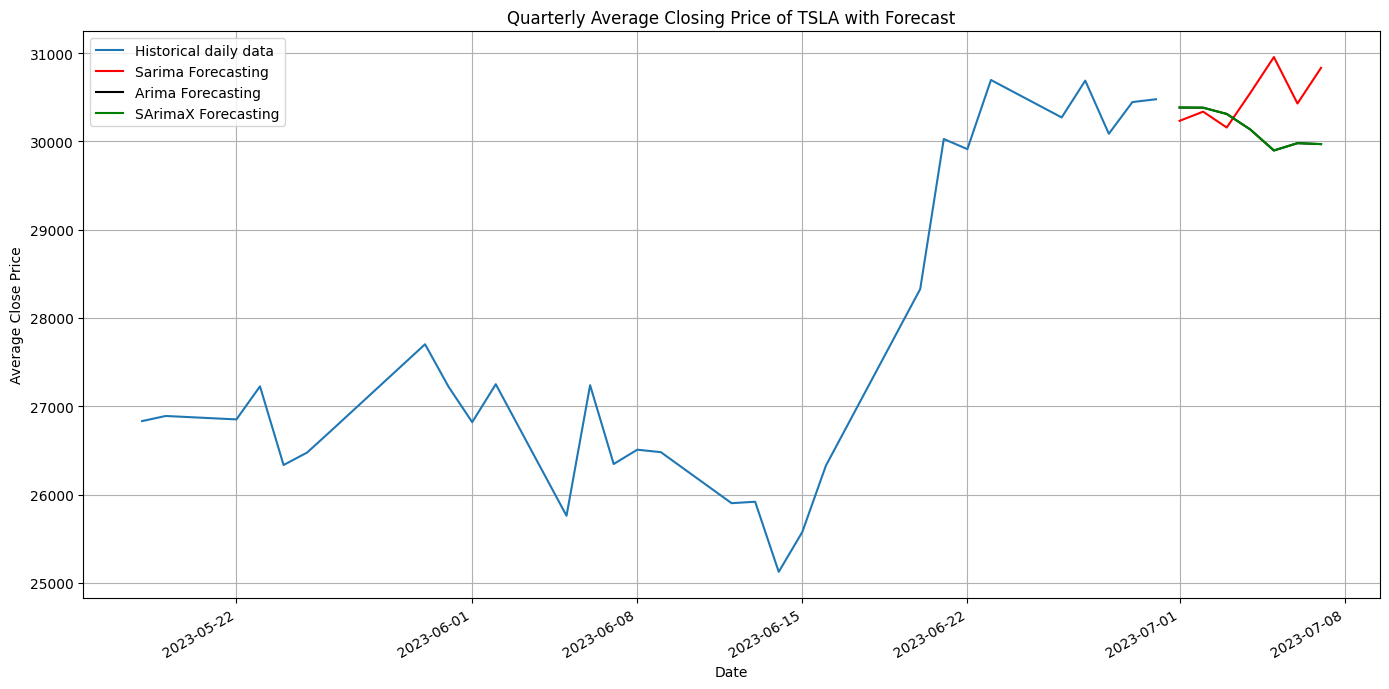

In [ ]:
# Plot historical and forecasted data
plt.figure(figsize=(14, 7))
df['BTC'][df_test.index[-30]:].plot(label='Historical daily data', legend=True)
forecast_series_sarima.plot(label='Sarima Forecasting', color='red', legend=True)
forecast_series_arima.plot(label='Arima Forecasting', color='black', legend=True)
forecast_series_arima.plot(label='SARIMAX Forecasting', color='green', legend=True)
plt.title('Quarterly Average Closing Price of TSLA with Forecast')
plt.ylabel('Average Close Price')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

## Finally, lets Check Trend, seasonal components and residual errors

### --->Lets visualize

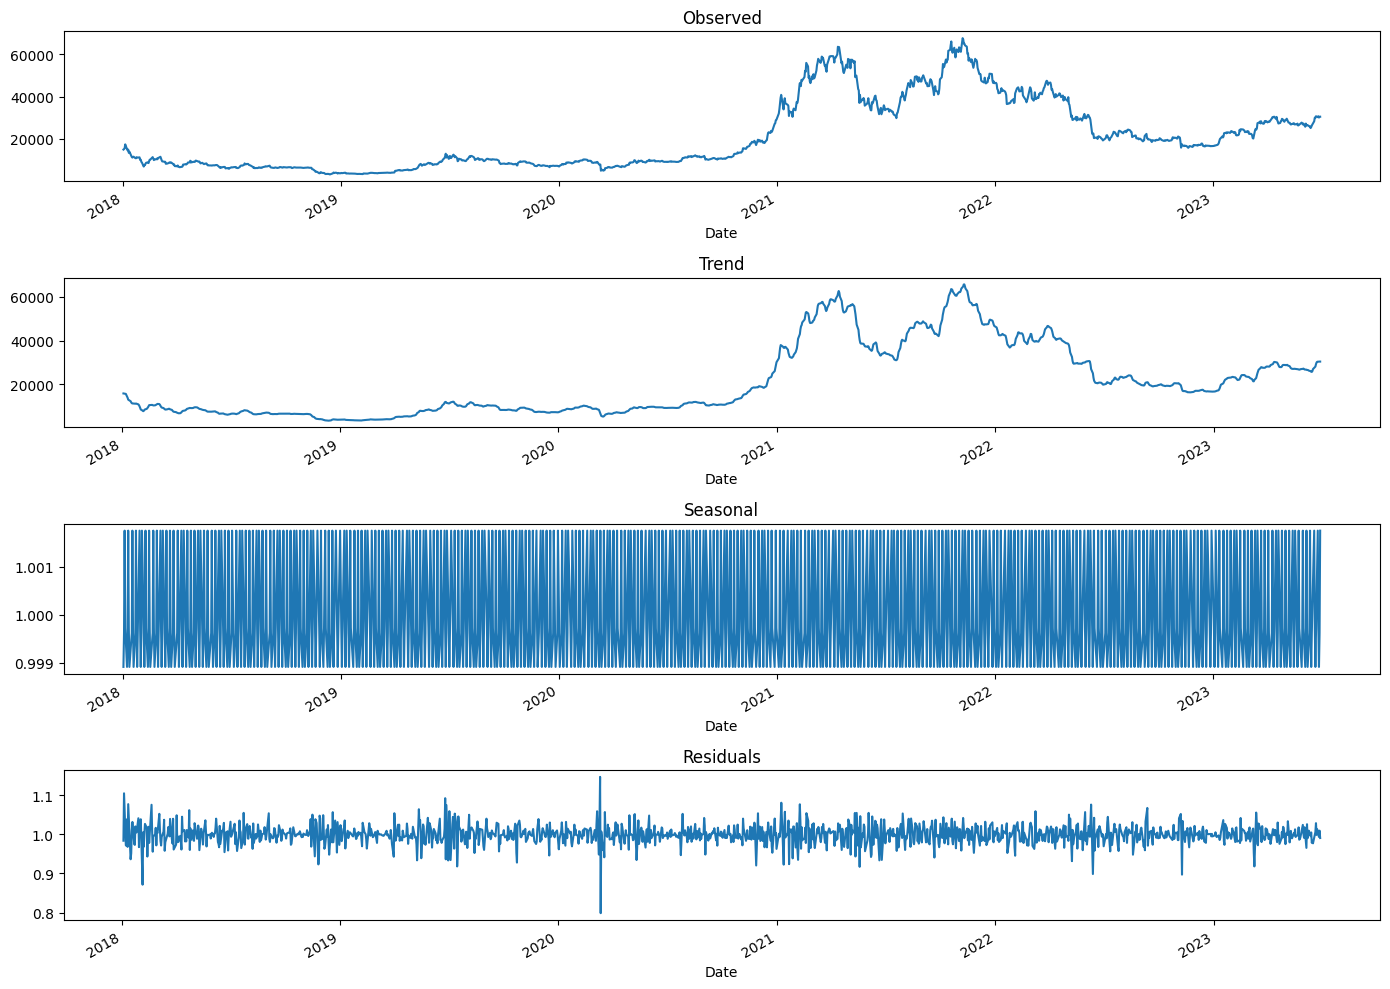

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the daily closing prices using the correct parameter
decomposition = seasonal_decompose(df['BTC'], model='multiplicative', period=4)  # Using Quarterly frequency

# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residuals')

plt.tight_layout()
plt.show()